In [42]:
import pandas as pd
import seaborn as sns 
%matplotlib notebook
import matplotlib.pyplot as plt

# 4. 그래프 그리기
### 4-1 시각화가 필요한 이유
<pre>
    데이터의 요약통계량, 수치분석으로만 데이터의 특징을 파악할 수 없기에 시각화가 필요함.
    (엔스콤의 함정)
</pre>

In [43]:
# 앤스콤 데이터 로드
ans = sns.load_dataset('anscombe')
print('{}\n'.format(ans.head()))
print(type(ans))

# 앤스콤 1 데이터 추출
ds_1 = ans[ans['dataset']=='I']
plt.plot(ds_1['x'],ds_1['y']) # 선그래프로 나타내기

  dataset     x     y
0       I  10.0  8.04
1       I   8.0  6.95
2       I  13.0  7.58
3       I   9.0  8.81
4       I  11.0  8.33

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>

In [44]:
# 점으로 나타내기 
plt.plot(ds_1['x'],ds_1['y'],'o')

#### matplotlib로 그래프 그리기
<pre>
    1. 전체 그래프가 위치할 기본 틀을 만든다. 
    2. 그래프를  그려 널을 그래프 격자를 만든다.
    3. 격자에 그래프를 하나씩 추가한다. 격자에 그래프가 추가되는 순서는 왼->오
    4. 첫 번째 행이 꽉 참ㄴ 두 번째 행에 그래프를 그려 넣는다.
</pre>

In [45]:
# 앤스콤 dataset 빈도 구하기
print(ans['dataset'].value_counts()) # 시리즈 빈도
print(ans['dataset'].value_counts(normalize=True)) # 빈도율

II     11
IV     11
I      11
III    11
Name: dataset, dtype: int64
II     0.25
IV     0.25
I      0.25
III    0.25
Name: dataset, dtype: float64


<IPython.core.display.Javascript object>


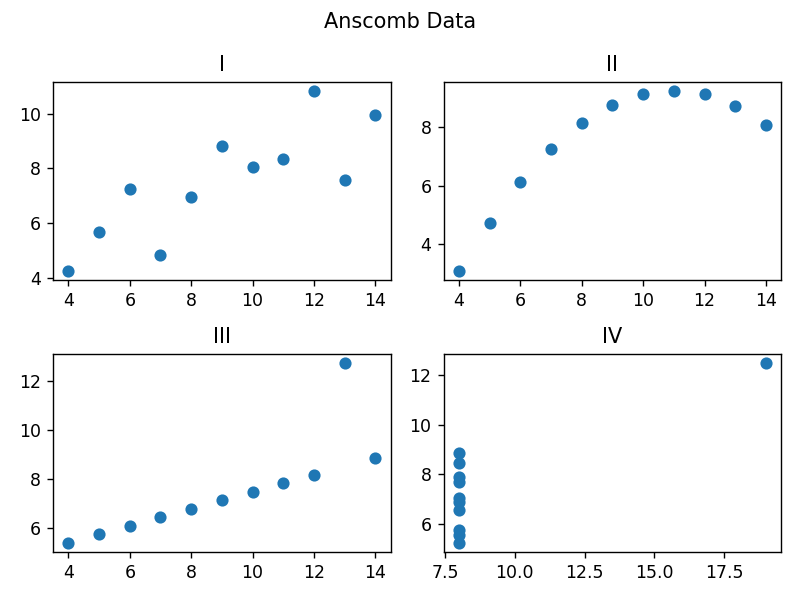

In [46]:
# 앤스콤 데이터셋 모두 사용해 그래프 만들기 
# 데이터 추출 
ds_2 = ans[ans['dataset']=='II']
ds_3 = ans[ans['dataset']=='III']
ds_4 = ans[ans['dataset']=='IV']

# 격자 생성
fig = plt.figure()
axes1 = fig.add_subplot(2,2,1) # (기본 틀의 행 크기. 열 크기)
axes2 = fig.add_subplot(2,2,2)
axes3 = fig.add_subplot(2,2,3)
axes4 = fig.add_subplot(2,2,4)

# 그래프 생성 
axes1.plot(ds_1['x'],ds_1['y'],'o')
axes2.plot(ds_2['x'],ds_2['y'],'o')
axes3.plot(ds_3['x'],ds_3['y'],'o')
axes4.plot(ds_4['x'],ds_4['y'],'o')

# 격자에 제목 추가 
fig.suptitle('Anscomb Data')
axes1.set_title('I')
axes2.set_title('II')
axes3.set_title('III')
axes4.set_title('IV')

# 격자 레이아웃 조절
fig.tight_layout()

### 4-2 matplotlib 자유자재로 사용하기

In [47]:
tips = sns.load_dataset('tips')
print('{}\n'.format(tips.head()))
print(type(tips))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

<class 'pandas.core.frame.DataFrame'>


<IPython.core.display.Javascript object>


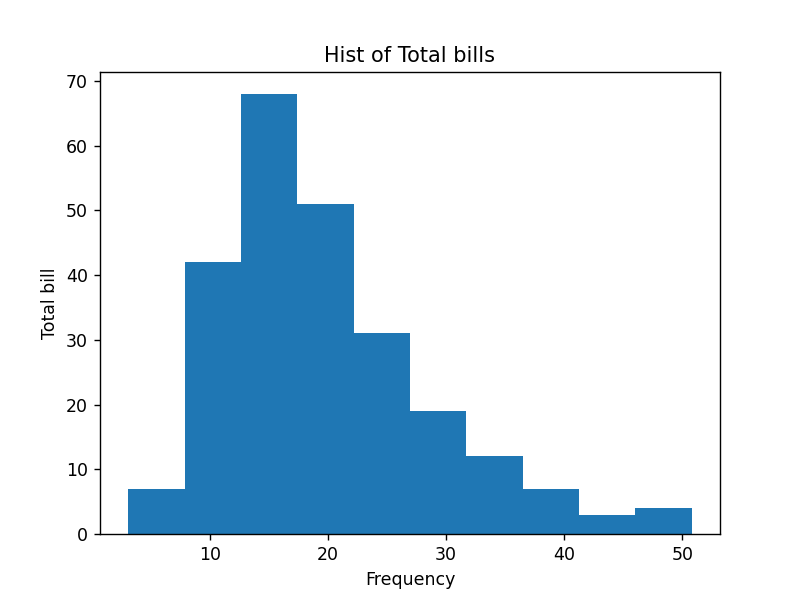

Text(0, 0.5, 'Total bill')

In [48]:
# Histogram
fig_h = plt.figure()
axes_h = fig_h.add_subplot(1,1,1)
axes_h.hist(tips['total_bill'], bins=10) # bins인잣값을 이용해 x축의 간격을 조정
axes_h.set_title('Hist of Total bills')
axes_h.set_xlabel('Frequency')
axes_h.set_ylabel('Total bill') # y축은 변수

<IPython.core.display.Javascript object>


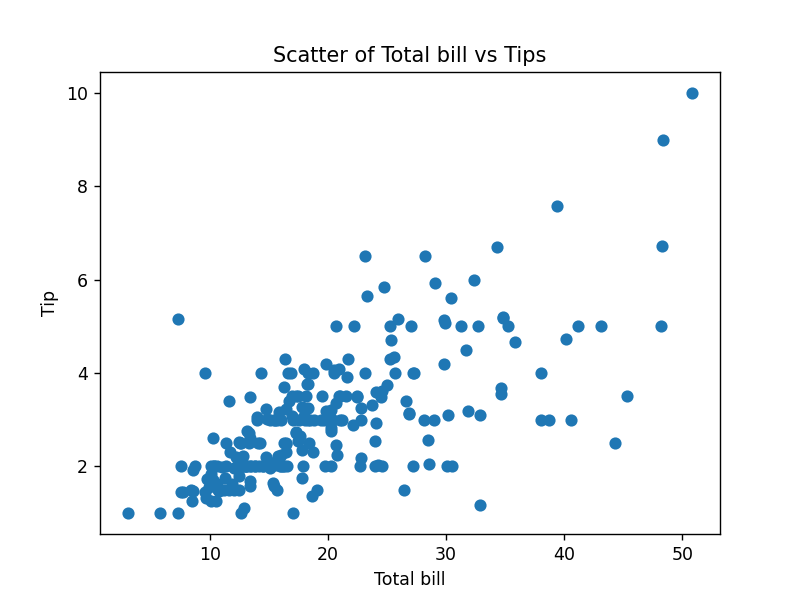

Text(0, 0.5, 'Tip')

In [49]:
# Scatter plot = Bivariate graph
fig_s = plt.figure()
axes_s = fig_s.add_subplot(1,1,1)
axes_s.scatter(tips['total_bill'],tips['tip'])
axes_s.set_title('Scatter of Total bill vs Tips')
axes_s.set_xlabel('Total bill')
axes_s.set_ylabel('Tip')

<IPython.core.display.Javascript object>


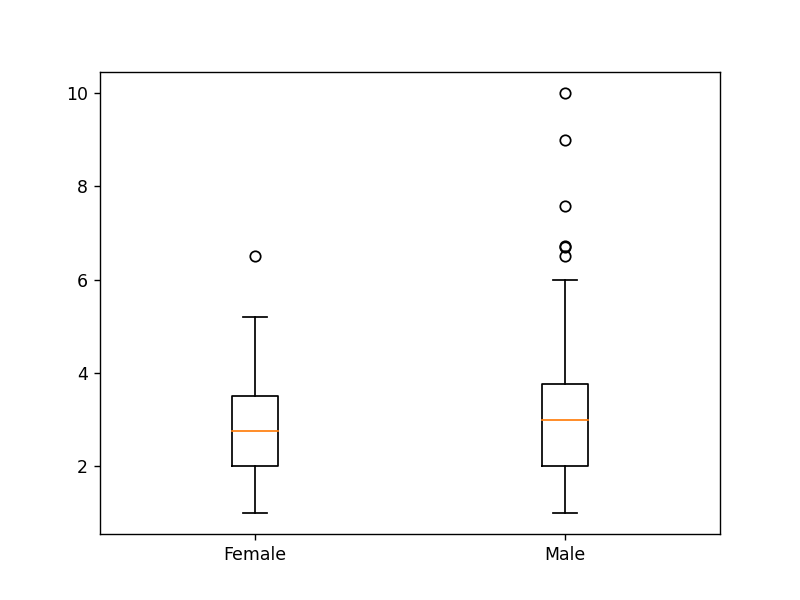

{'whiskers': [<matplotlib.lines.Line2D at 0x21df3577a48>,
 'caps': [<matplotlib.lines.Line2D at 0x21df3596fc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x21df358ff48>,
 'medians': [<matplotlib.lines.Line2D at 0x21df359b3c8>,
 'fliers': [<matplotlib.lines.Line2D at 0x21df359fdc8>,
 'means': []}

In [50]:
fig_b = plt.figure()
axes_b = fig_b.add_subplot(1,1,1)
axes_b.boxplot([
    tips[tips['sex'] == 'Female']['tip'],
    tips[tips['sex'] == 'Male']['tip']],
    labels=['Female','Male']
) 

#### Multivariate data
<pre>
    이변량에서 변수를 (한개 이상)추가하여 각자 다르게 표현한다.  
    다변량 그래프는 적재적소에 맞는 그래프를 표현해야 한다.
</pre>

<IPython.core.display.Javascript object>


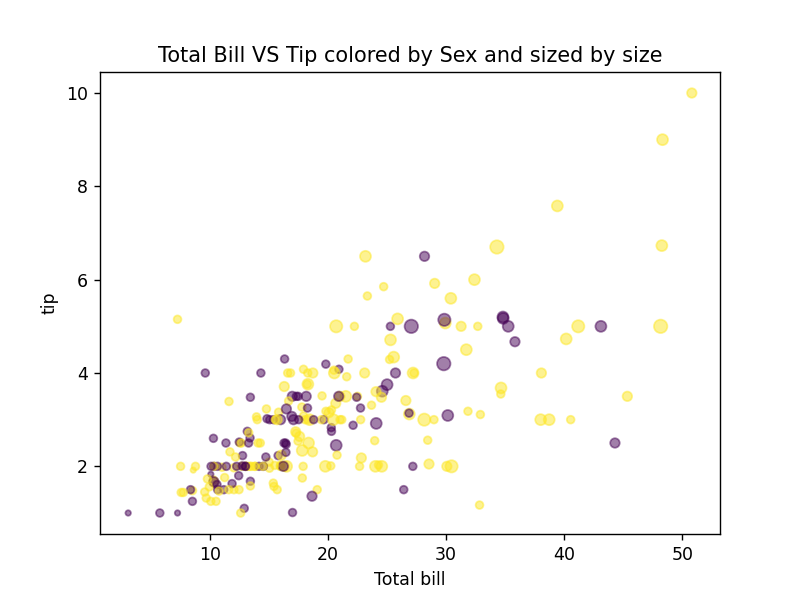

Text(0, 0.5, 'tip')

In [51]:
# multivariate - scatter
# 성별을 정수형 binary로 변환 
def recode_s(sex):
    if sex == 'Female':
        return 0 
    else: 
        return 1
    
# 정수형 셩별 데이터 변수 추가 
tips['s_col'] = tips['sex'].apply(recode_s)

# 테이블당 인원 수 추가한 산점도 그래프 추가 
fig_tn = plt.figure()
axes_tn = fig_tn.add_subplot(1,1,1)
axes_tn.scatter(
    x=tips['total_bill'],
    y=tips['tip'],
    s=tips['size']*10, # 테이블당 인원 수 
    c=tips['s_col'],
    alpha=0.5 # 투명도 조절 
)
axes_tn.set_title('Total Bill VS Tip colored by Sex and sized by size')
axes_tn.set_xlabel('Total bill')
axes_tn.set_ylabel('tip')

### 4-3 Seaborn 라이브러리 자유자재로 사용하기

#### 단변량 그래프

<IPython.core.display.Javascript object>


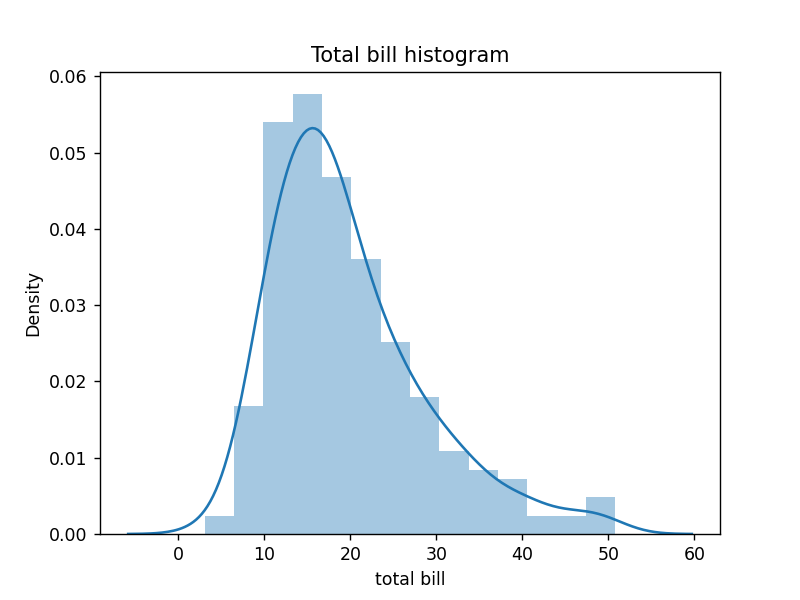

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'total bill')

In [52]:
# 히스토그램 
ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], kde=True) 
# 밀집도그래프 제외하려면 kde 인잣값을 false로, 만약 밀집도만 나타내려면 kde대신 hist인잣값을 false로
# 양탄자 그래프까지 나타내려면 rug인잣값을 true로
ax.set_title('Total bill histogram')
ax.set_xlabel('total bill')

> 양탄자 그래프 <br>
그래프 축에 동일한 길이의 직선을 붙여 데이터의 밀집 정도를 표현한 그래프

<IPython.core.display.Javascript object>


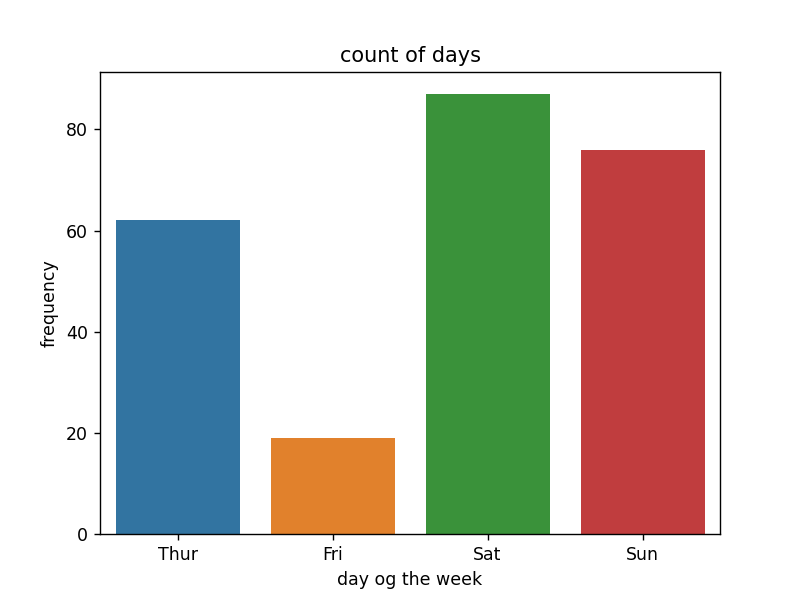

C:\Users\user\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'frequency')

In [53]:
# count 그래프 
ax_c = plt.subplots()
ax_c = sns.countplot('day', data=tips)
ax_c.set_title('count of days')
ax_c.set_xlabel('day og the week')
ax_c.set_ylabel('frequency')

#### 이변량 그래프

<IPython.core.display.Javascript object>


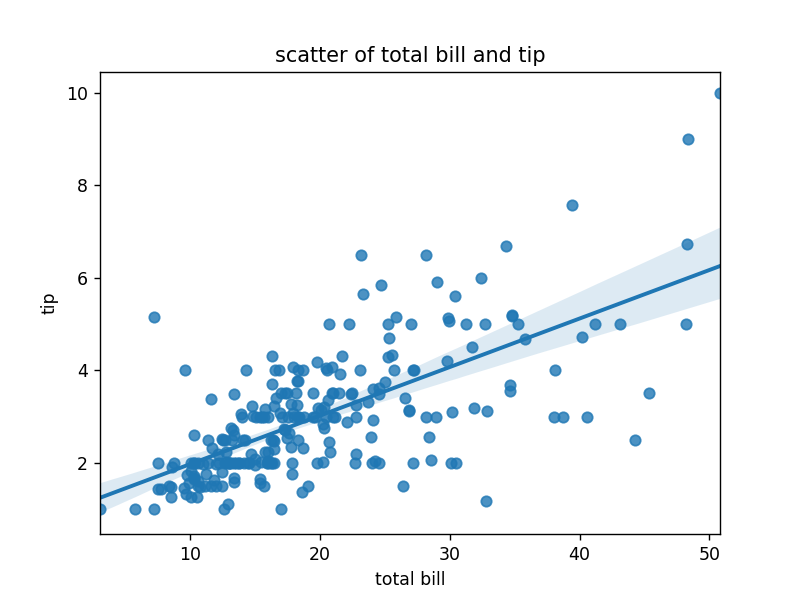

Text(0, 0.5, 'tip')

In [54]:
# 산점도와 회귀선
ax_b = plt.subplots()
ax_b = sns.regplot(x='total_bill', y='tip', data=tips, fit_reg=True)
# 회귀선 제외하려면 fit_reg인잣값 false
ax_b.set_title('scatter of total bill and tip')
ax_b.set_xlabel('total bill')
ax_b.set_ylabel('tip')

> jointplot <br>
scatter plot과 histogram을 한 번에 그려줌

In [59]:
# scatter and histogram
ax_j = sns.jointplot(x='total_bill', y='tip',data=tips, kind='hex')
# kind 인잣값으로 hex를 추가하면 산점도에서 겹쳐보이는 점을 구분할 수 있도록 육각형으로 도현할 수 있다
ax_j.set_axis_labels(xlabel='Total bill',ylabel='tip')
ax_j.fig.suptitle('joint plot of total bill and tip', fontsize=10, y=1.03)

<IPython.core.display.Javascript object>

Text(0.5, 1.03, 'joint plot of total bill and tip')

#### 이차원 밀집도

In [61]:
ax_d = plt.subplot()
ax_d = sns.kdeplot(data=tips['total_bill'],
                  data2 = tips['tip'],
                  shade = True) # 음영효과 추가 
ax_d.set_xlabel('total bill')
ax_d.set_ylabel('tip')

<IPython.core.display.Javascript object>

C:\Users\user\Anaconda3\lib\site-packages\seaborn\distributions.py:1641: FutureWarning: Use `x` and `y` rather than `data` `and `data2`
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'tip')

<IPython.core.display.Javascript object>


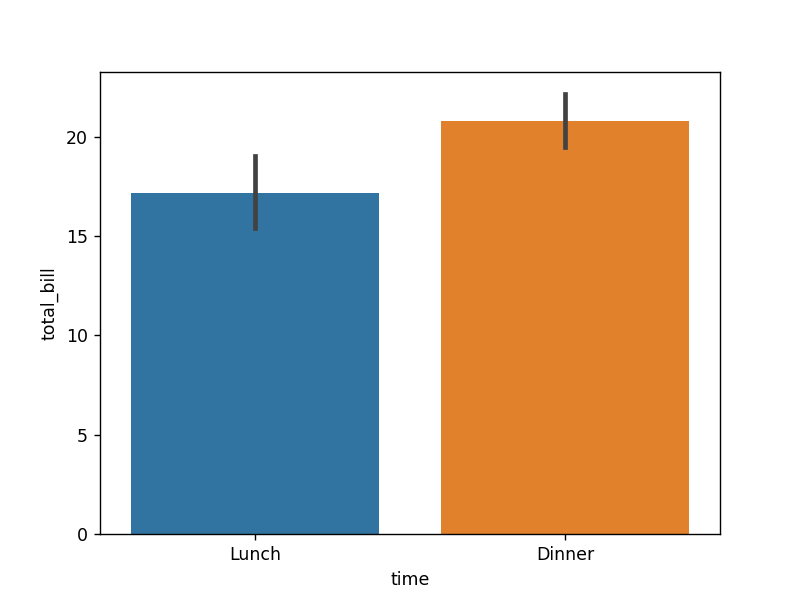

Text(0, 0.5, 'total_bill')

In [57]:
# bar graph 
ax_bar  = plt.subplots()
ax_bar = sns.barplot(x='time', y='total_bill', data=tips)
ax_bar.set_xlabel('time')
ax_bar.set_ylabel('total_bill')

In [62]:
# box plot 
ax_box = plt.subplots()
ax_box = sns.boxplot(x='time', y='total_bill', data=tips)
ax_box.set_xlabel('time')
ax_box.set_ylabel('total_bill')

<IPython.core.display.Javascript object>

Text(0, 0.5, 'total_bill')

>  Violin plot <br>
데이터 분산 표현이 모호하게 표현되는 box plot의 단점을 보완하기 위해 사용<br>
violin plot은 box plot에 kernel density를 추정하여 표현함

Kernel Density Esimation(KDE) <br>
    1. Density estimate <br>
        관측치로부터 확률 분포를 estimate하는 것 <br>
        즉, 변수가 어떤 값의 분포 특성을 갖는지 좀 더 정확히 파악할 수 있고,<br>
        어떤 변수가 가질 수 있는 값 & 그 값을 가질 가능성의 정도를 추정한다. <br><br>
    2. Parametric vs. Non-Parametric density estimation 
        - Parametric density estimation는 미리 pdf에 대한 model을 정하고, <br>
          관측치로부터 model의 parameter만 추정하는 방식임. <br>
          ex) X~Nor(n, var)일 때 모수인 평균과 분산을 구하는 것 <br>
        - Non-Parametric density estimation는 어떠한 사전 정보나 <br>
          지식 없이 순수하게 관측된 자료만으로 pdf를 추정하는 것 <br>
          ex) 관측치로부터 histogram을 구하여 normalize 한 후 pdf 구함 <br><br>
     3. KDE <br>
         non-parametric density estimation 방법 중 하나, kenel fumction을 이용하여<br>
         histogram 방법의 문제점을 개선한 방법임<br>
         수학적으로 Kernel function은 원점을 중심으로 대칭이면서<br>
         적분 값이 1인 non-negative함수로 정의되며 gausian, epanechikov, uniform함수 등이 있음<br> 
         <img src= 'https://t1.daumcdn.net/cfile/tistory/264B9C3A54F010DB07'>
         <img src= 'https://t1.daumcdn.net/cfile/tistory/2139564754F0129628'>
         즉 KDE는 관측치 smaple data X1, X2,..와 확률변수 X, K를 kernel function이라 하고,<br>
         확률변수 X에 대한 pdf를 다름과 추정한다.
         <img src='https://t1.daumcdn.net/cfile/tistory/261A943654F0325532'>
         위 식을 직관적으로 들어가면 <br>
         K(x-xi): 관측된 데이터 가가마다 해당 데이터 값을 중심으로 하느 kernel function을 생성<br>
         위에 만들어진 kernel function들을 모두 더한 후 전체 데이터 개수로 나눈다.<br>
         이에 histogram과 비교하면 KDE는 각 데이터를 kernel function로 대치하여 더함으로 <br>
         smoothing한  pdf를 얻을 수 있다.(histogram은 bin값을 증가시켜 불연속성을 발생함)<br>
         즉, KDE의 PDF는 histogram pdf를 smoothing한 것으로<br>
         smoothing정도는어떤 bandwidth값의 kernel function을 사용했느냐에 따라 달라짐<br>
         실제 KDE를 사용할 때, 어떤 kernel function을 사용할지와 <br>
         bandwidth parameter인 h값을 어떻게 잡을지이다. 가장의 최적의 kernel function은<br>
         Epanechikov kernel이며 계산의 편의상 gaussian kenel function도 많이 사용된다고 함<br><br>
         출처 <br>
         <a href = 'https://darkpgmr.tistory.com/147'>Kernel Density Estimation(커널밀도추정)에 대한 이해</a>
        
         
        
        
       
